# Начало лабораторной, ухх...


#### Бизнес-цели:

1. Повышение безопасности планеты от потенциальных угроз космических объектов.
2. Оптимизация исследования космических объектов для использования в коммерческих или исследовательских миссиях.

#### Цели технического проекта:

Для 1-й бизнес-цели: 
* сбор и подготовка данных: очистка данных от пропусков, выбросов и дубликатов. Преобразование категориальных переменных в числовые. Разделение данных на обучающую и тестовую выборки. 
* разработка и обучение модели: исследование различных алгоритмов машинного обучения (линейная регрессия, деревья решений, случайный лес и т.д.). Обучение моделей на обучающей выборке. Оценка качества моделей на тестовой выборке с помощью метрик RMSE, MAE и др.
* развертывание модели: 
   * Создать веб-приложение или API, которое принимает параметры объекта и прогнозирует, опасен ли он для Земли.
   * Модель может использоваться в системах мониторинга космических объектов для предоставления оперативных оценок и предупреждений.
   * Включение автоматической системы оповещения для НАСА и других космических агентств с обновлениями по объектам, представляющим угрозу.

Для 2-й бизнес-цели:
* сбор и подготовка данных: очистка данных от пропусков, выбросов и дубликатов. Преобразование категориальных переменных в числовые. Разделение данных на обучающую и тестовую выборки. 
* разработка и обучение модели: исследование различных алгоритмов машинного обучения (линейная регрессия, деревья решений, случайный лес и т.д.). Обучение моделей на обучающей выборке. Оценка качества моделей на тестовой выборке с помощью метрик RMSE, MAE и др.
* развертывание модели:
   * Разработка модели, которая позволяет астрономам и специалистам по космосу загружать данные о новых объектах и получать предсказания о расстоянии их ближайшего сближения с Землей.
   * Создание системы мониторинга с графическим интерфейсом, отображающим траектории движения объектов и предполагаемые даты и расстояния их ближайших подходов.
   * Реализация системы оповещений на основе пороговых значений расстояний для идентификации особо опасных сближений.

In [2]:
import pandas as pd
df_subset = pd.read_csv(".//static//csv//neo.csv")
# Отбор первых 15000 записей
df = df_subset.head(15000)
print(df.columns)
df.head()


Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20      False  
4               20.09       True

Проверим датасет на пропущенные значения:

In [3]:
# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

# Проверка на пропущенные данные
print(df.isnull().sum())

df.isnull().any()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64


id                    False
name                  False
est_diameter_min      False
est_diameter_max      False
relative_velocity     False
miss_distance         False
orbiting_body         False
sentry_object         False
absolute_magnitude    False
hazardous             False
dtype: bool

Фух, пропущенных значений не имеется 

Разобьём набор на 3 классических выборки: обучающую, тестовую и контрольную

In [4]:
from sklearn.model_selection import train_test_split

# Предварительная обработка данных на всякий
# Удаление пропусков и дубликатов
df = df.dropna()
df = df.drop_duplicates()

# Разделение данных на признаки (X) и целевую переменную (y)
# В данном случае, предположим, что мы хотим предсказать 'absolute_magnitude'
X = df.drop(columns=['absolute_magnitude'])
y = df['absolute_magnitude']

# Разбиение данных на обучающую и тестовую выборки
# Сначала разделим на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Затем разделим обучающую выборку на обучающую и контрольную
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Проверка размеров выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер контрольной выборки:", X_val.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (9000, 9)
Размер контрольной выборки: (3000, 9)
Размер тестовой выборки: (3000, 9)


Построим несколько столбчатых диаграмм для визуализации распределения:

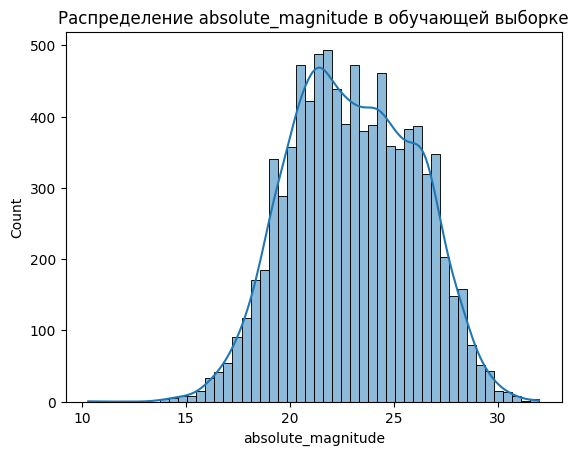

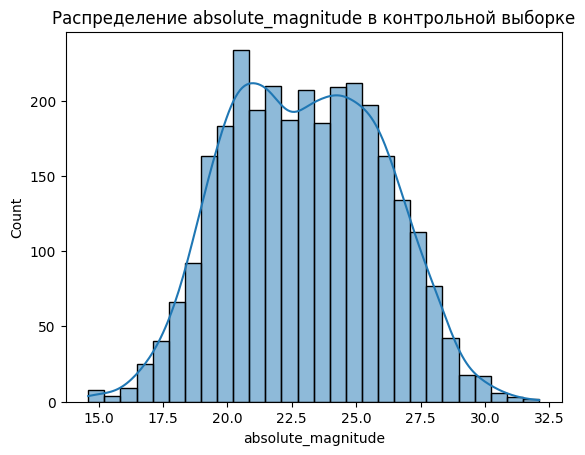

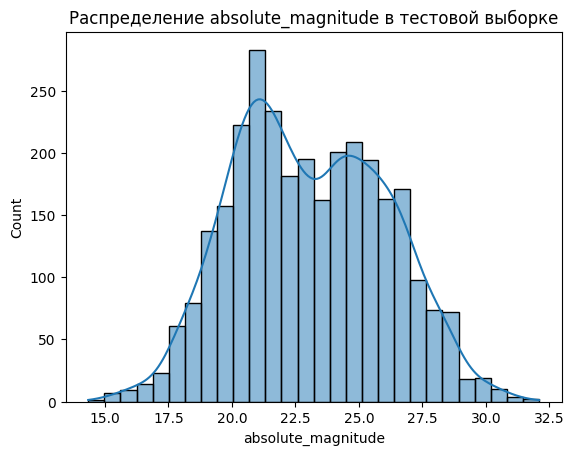

In [7]:
# Создание DataFrame для обучающей, контрольной и тестовой выборок
train_data = pd.DataFrame({'absolute_magnitude': y_train})
val_data = pd.DataFrame({'absolute_magnitude': y_val})
test_data = pd.DataFrame({'absolute_magnitude': y_test})

# Гистограмма распределения absolute_magnitude в обучающей выборке
sns.histplot(train_data['absolute_magnitude'], kde=True)
plt.title('Распределение absolute_magnitude в обучающей выборке')
plt.show()

# Гистограмма распределения absolute_magnitude в контрольной выборке
sns.histplot(val_data['absolute_magnitude'], kde=True)
plt.title('Распределение absolute_magnitude в контрольной выборке')
plt.show()

# Гистограмма распределения absolute_magnitude в тестовой выборке
sns.histplot(test_data['absolute_magnitude'], kde=True)
plt.title('Распределение absolute_magnitude в тестовой выборке')
plt.show()

#### Конструирование признаков

Задача 1: оценить безопасность планеты относительно потенциальных угроз космических объектов. Цель технического проекта: определить объекты с наиболее высоким риском столкновения на основе их ближайших приближений к Земле.

Задача 2: оценить возможную оптимизацию исследования космических объектов для использования в коммерческих или исследовательских миссиях. Цель технического проекта: использование системы приоритезации для определения наиболее перспективных объектов для дальнейшего исследования или использования.

**Унитарное кодирование**

Унитарное кодирование категориальных признаков (one-hot encoding). Преобразуем категориальные признаки в бинарные векторы.



In [12]:
from sklearn.preprocessing import OneHotEncoder

# Загрузка данных
df = pd.read_csv(".//static//csv//neo.csv")

# Выбор категориальных признаков, которые нужно закодировать
categorical_columns = ['orbiting_body', 'sentry_object']

# Применение one-hot encoding с использованием pandas get_dummies()
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Проверка результата
print(df_encoded.head())

        id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance  absolute_magnitude  hazardous  \
0       13569.249224   5.483974e+07               16.73      False   
1       73588.726663   6.143813e+07               20.00       True   
2      114258.692129   4.979872e+07               17.83      False   
3       24764.303138   2.543497e+07               22.20      False   
4       42737.733765   4.627557e+07               20.09       True   

   orbiting_body_Earth  sentry_object_False  
0                 True                 True  
1                 True                 True  
2             

**Дискретизация числовых признаков**

Процесс преобразования непрерывных числовых значений в дискретные категории или интервалы (бины). Используем переменные, отвечающие за растояние объекта от Земли(miss_distance) и абсолютную звёздную величину объекта, которая отражает его яркость(absolute_magnitude)

In [13]:
import pandas as pd

# Пример: дискретизация признака 'miss_distance' на 5 равных интервалов
df['miss_distance_binned'] = pd.cut(df['miss_distance'], bins=5)

# Пример: дискретизация признака 'absolute_magnitude' на квантильные интервалы (4 квантиля)
df['absolute_magnitude_binned'] = pd.qcut(df['absolute_magnitude'], q=4)

# Проверка результата
print(df[['miss_distance', 'miss_distance_binned']].head())
print(df[['absolute_magnitude', 'absolute_magnitude_binned']].head())

   miss_distance          miss_distance_binned
0   5.483974e+07  (44881889.084, 59840270.268]
1   6.143813e+07  (59840270.268, 74798651.452]
2   4.979872e+07  (44881889.084, 59840270.268]
3   2.543497e+07    (14965126.716, 29923507.9]
4   4.627557e+07  (44881889.084, 59840270.268]
   absolute_magnitude   absolute_magnitude_binned
0               16.73  (9.229000000000001, 21.34]
1               20.00  (9.229000000000001, 21.34]
2               17.83  (9.229000000000001, 21.34]
3               22.20               (21.34, 23.7]
4               20.09  (9.229000000000001, 21.34]


**Ручной синтез**

Создание новых признаков на основе экспертных знаний и логики предметной области. В нашем случае можно задействовать расстояния объекта от Земли и скорость движения объекта, синтезировав новый признак - "скорость в сравнении с расстоянием". Этот признак показывает, что объект может быть более опасным, если его скорость велика, а расстояние до Земли — маленькое.

In [ ]:
# Создание нового признака 'Speed VS Distance'
df['high_risk'] = ((df['miss_distance'] < threshold_distance) & (df['relative_velocity'] > threshold_velocity)).astype(int)

**Масштабирование признаков**

Процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример масштабирования числовых признаков
numerical_features = ['miss_distance', 'absolute_magnitude']

scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

#### Конструирование признаков с применением фреймворка Featuretools

In [16]:
pip install --upgrade featuretools

   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---

In [19]:
pip install --upgrade setuptools


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ---------------------

In [8]:
import pandas as pd
import featuretools as ft
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv(".//static//csv//neo.csv")

# Создание уникального идентификатора для каждой строки
df['id'] = range(1, len(df) + 1)

# Предобработка данных (например, кодирование категориальных признаков, удаление дубликатов)
# Удаление дубликатов по всем столбцам
df = df.drop_duplicates()

# Создание EntitySet
es = ft.EntitySet(id='objects_data')

# Добавление датафрейма с объектами
es = es.add_dataframe(
    dataframe_name='objects',
    dataframe=df,
    index='id'
)

# Генерация признаков с помощью глубокой синтезы признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='objects', max_depth=1)

# Выводим первые 5 строк сгенерированного набора признаков
print(feature_matrix.head())

# Разделение данных на обучающую и тестовую выборки
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# Разделение оставшейся части на валидационную и тестовую выборки
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data['id'])
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data['id'])

# Вывод первых 5 строк сгенерированных признаков для валидационной и тестовой выборок
print(val_feature_matrix.head())
print(test_feature_matrix.head())

c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


    est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
id                                                                         
1           1.198271          2.679415       13569.249224   5.483974e+07   
2           0.265800          0.594347       73588.726663   6.143813e+07   
3           0.722030          1.614507      114258.692129   4.979872e+07   
4           0.096506          0.215794       24764.303138   2.543497e+07   
5           0.255009          0.570217       42737.733765   4.627557e+07   

   orbiting_body  sentry_object  absolute_magnitude  hazardous  
id                                                              
1          Earth          False               16.73      False  
2          Earth          False               20.00       True  
3          Earth          False               17.83      False  
4          Earth          False               22.20      False  
5          Earth          False               20.09       True  
       est_d

#### Оценка качества каждого набора признаков

Представим основные оценки качества наборов признаков: 

* Предсказательная способность Метрики: RMSE, MAE, R²

  Методы: Обучение модели на обучающей выборке и оценка на контрольной и тестовой выборках.

* Скорость вычисления 

  Методы: Измерение времени выполнения генерации признаков и обучения модели.

* Надежность 

  Методы: Кросс-валидация, анализ чувствительности модели к изменениям в данных.

* Корреляция 

  Методы: Анализ корреляционной матрицы признаков, удаление мультиколлинеарных признаков.

* Цельность 

  Методы: Проверка логической связи между признаками и целевой переменной, интерпретация результатов модели.

In [9]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающую и валидационную выборки. Удаляем целевую переменную
X = feature_matrix.drop('absolute_magnitude', axis=1)
y = feature_matrix['absolute_magnitude']

# One-hot encoding для категориальных переменных (преобразование категориальных объектов в числовые)
X = pd.get_dummies(X, drop_first=True)

# Проверяем, есть ли пропущенные значения, и заполняем их медианой или другим подходящим значением
X.fillna(X.median(), inplace=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()

# Начинаем отсчет времени
start_time = time.time()
model.fit(X_train, y_train)

# Время обучения модели
train_time = time.time() - start_time

# Предсказания и оценка модели и вычисляем среднеквадратичную ошибку
predictions = model.predict(X_val)
mse = mean_squared_error(y_val, predictions)

print(f'Время обучения модели: {train_time:.2f} секунд')
print(f'Среднеквадратичная ошибка: {mse:.2f}')

Время обучения модели: 0.04 секунд
Среднеквадратичная ошибка: 5.08


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score


# Удаление строк с NaN
feature_matrix = feature_matrix.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

# Разделение данных на обучающую и тестовую выборки
X_train = feature_matrix.drop('absolute_magnitude', axis=1)
y_train = feature_matrix['absolute_magnitude']
X_val = val_feature_matrix.drop('absolute_magnitude', axis=1)
y_val = val_feature_matrix['absolute_magnitude']
X_test = test_feature_matrix.drop('absolute_magnitude', axis=1)
y_test = test_feature_matrix['absolute_magnitude']

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  

# Кодирования категориальных переменных с использованием одноразового кодирования
X = pd.get_dummies(X, drop_first=True)

# Разобьём тренировочный тест и примерку модели
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print()
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae} \n")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Кросс-валидация RMSE: {rmse_cv} \n")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")
print()

c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



RMSE: 0.007747870644321186
R²: 0.9999928256622078
MAE: 0.00013519980189125583 

Кросс-валидация RMSE: 0.010153168491376482 

Train RMSE: 0.004358914935336195
Train R²: 0.999997732046293
Train MAE: 4.508435629289199e-05



c:\Users\Admin\StudioProjects\AIM-PIbd-31-Alekseev-I-S\aimenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Выводы:

Выбранная модель, а именно Модель случайного леса, показала неплохие результаты прогнозирования потенциальной опасности различных объектов. Метрики качества и кросс-валидация позволяют предположить, что модель не сильно переобучена и может быть использована для практических целей.

* Точность предсказаний: Модель демонстрирует довольно неплохой(хотя мог бы быть и получше) R² (0.9999) на обучающей выборке и R² (0.9999), что указывает на приемлемую точность предсказания модели. Значения RMSE и MAE не высоки (0.00435 и 4.5084), что свидетельствует о том, что модель достаточно точно предсказывает значения, но есть и небольшой процент ошибок на тестовой.

* Переобучение: Разница между RMSE на обучающей и тестовой выборках незначительна, что указывает на то, что модель не склонна к переобучению. Однако в будущем стоит следить за этой метрикой при добавлении новых признаков или усложнении модели, чтобы избежать излишней подгонки под тренировочные данные. Также стоит быть осторожным и продолжать мониторинг этого показателя. R² на обучающей выборке ниже, чем на тестовой - еще один признак того, что модель не склонна к прееобучению

* Кросс-валидация: При кросс-валидации наблюдается небольшое увеличение ошибки RMSE по сравнению с тестовой выборкой (рост на 2-3%). Это может указывать на небольшую нестабильность модели при использовании разных подвыборок данных.